# In this notebook we check what the agent has learnt

In [1]:
import gym
import torch
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

from config import *
from agent import *
from utils import *

## 1) LunarLander

### 1) rewards

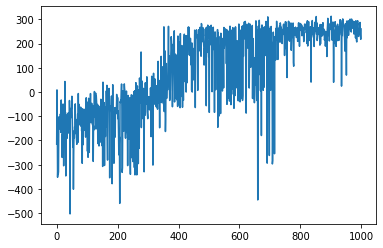

In [2]:
rewards = np.load('./lunarlander results/LunarLander-v2_rewards.npy')
plt.plot(rewards)
plt.show()

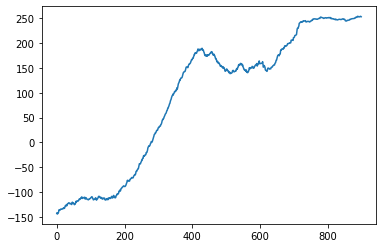

In [3]:
average = [np.mean(rewards[i-100:i]) for i in range(100, len(rewards))]
plt.plot(average)
plt.show()

### 2) watch the show

In [4]:
env = gym.make(RAM_ENV_NAME)
agent = Agent(env.observation_space.shape[0], env.action_space.n, BATCH_SIZE, LEARNING_RATE, TAU, GAMMA, DEVICE, False)
agent.Q_local.load_state_dict(torch.load('./lunarlander results/LunarLander-v2_weights.pth'))

rewards_log = []
eps = EPS_MIN
num_episode = 10
max_t = 1000

for i in range(1, 1 + num_episode):

    episodic_reward = 0
    done = False
    state = env.reset()
    t = 0

    while not done and t < max_t:

        env.render()
        t += 1
        action = agent.act(state, eps)
        next_state, reward, done, _ = env.step(action)
        state = next_state.copy()
        episodic_reward += reward

    rewards_log.append(episodic_reward)
    
rewards_log

/Users/lifengwei/anaconda3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[206.27671590652278,
 276.2709292390149,
 199.95760816971915,
 231.99752717807343,
 274.0654439123302,
 265.60610112764783,
 254.63187925307597,
 207.80847979636397,
 186.59357127855853,
 178.1526609880204]

In [5]:
env.close()

## 2) Pong

### 1) rewards

In [6]:
num_frame = 2 # choose from 2, 3 and 4

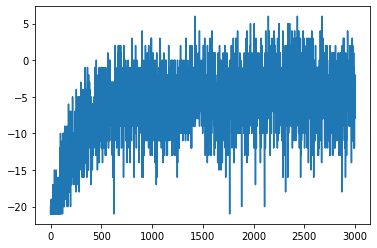

In [7]:
rewards = np.load('./pong results/{}/Pong-v0_rewards.npy'.format(num_frame))
plt.plot(rewards)
plt.show()

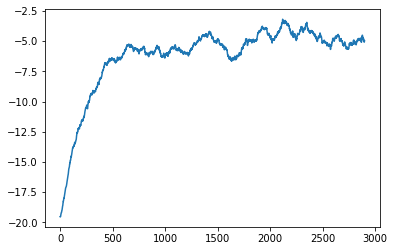

In [8]:
average = [np.mean(rewards[i-100:i]) for i in range(100, len(rewards))]
plt.plot(average)
plt.show()

### 2) watch the show

In [9]:
env = gym.make(VISUAL_ENV_NAME)

rewards_log = []
eps = EPS_MIN
num_episode = 4
agent = Agent(num_frame, env.action_space.n, BATCH_SIZE, LEARNING_RATE, TAU, GAMMA, DEVICE, True)
agent.Q_local.load_state_dict(torch.load('./pong results/{}/Pong-v0_weights.pth'.format(num_frame)))
max_t = 1000

for i in range(1, 1 + num_episode):

    episodic_reward = 0
    done = False
    frame = env.reset()
    frame = preprocess(frame, CONSTANT)
    state_deque = deque(maxlen=num_frame)
    for _ in range(num_frame):
        state_deque.append(frame)
    state = np.stack(state_deque, axis=0)
    state = np.expand_dims(state, axis=0)
    t = 0

    while not done and t < max_t:
        
        env.render()
        t += 1
        action = agent.act(state, eps)
        frame, reward, done, _ = env.step(action)
        frame = preprocess(frame, CONSTANT)
        state_deque.append(frame)
        next_state = np.stack(state_deque, axis=0)
        next_state = np.expand_dims(next_state, axis=0)
        state = next_state.copy()
        episodic_reward += reward

    rewards_log.append(episodic_reward)
    
rewards_log

[-10.0, -3.0, -8.0, -2.0]

In [10]:
env.close()

## 3) Simpler Pong

### 1) rewards

In [11]:
num_frame = 2 # choose from 2, 3 and 4

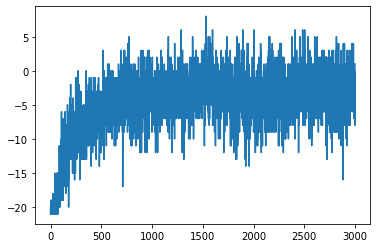

In [12]:
rewards = np.load('./pong results/smaller_{}/Pong-v0_smaller_rewards.npy'.format(num_frame))
plt.plot(rewards)
plt.show()

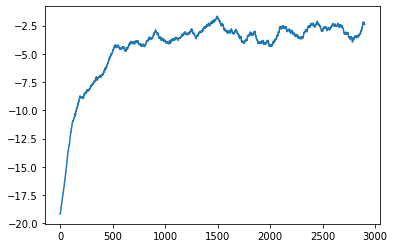

In [13]:
average = [np.mean(rewards[i-100:i]) for i in range(100, len(rewards))]
plt.plot(average)
plt.show()

In [14]:
env = gym.make(VISUAL_ENV_NAME)

rewards_log = []
eps = EPS_MIN
num_episode = 4
agent = Agent(num_frame, 3, BATCH_SIZE, LEARNING_RATE, TAU, GAMMA, DEVICE, True)
agent.Q_local.load_state_dict(torch.load('./pong results/smaller_{}/Pong-v0_smaller_weights.pth'.format(num_frame)))
max_t = 1000

for i in range(1, 1 + num_episode):

    episodic_reward = 0
    done = False
    frame = env.reset()
    frame = preprocess(frame, CONSTANT)
    state_deque = deque(maxlen=num_frame)
    for _ in range(num_frame):
        state_deque.append(frame)
    state = np.stack(state_deque, axis=0)
    state = np.expand_dims(state, axis=0)
    t = 0

    while not done and t < max_t:
        
        env.render()
        t += 1
        action = agent.act(state, eps)
        frame, reward, done, _ = env.step(action + 1)
        frame = preprocess(frame, CONSTANT)
        state_deque.append(frame)
        next_state = np.stack(state_deque, axis=0)
        next_state = np.expand_dims(next_state, axis=0)
        state = next_state.copy()
        episodic_reward += reward

    rewards_log.append(episodic_reward)
    
rewards_log

[-6.0, 1.0, 3.0, 1.0, -2.0, -1.0, -2.0, -2.0, -8.0, 0.0]

In [15]:
env.close()